# covid-19 prediction

In [44]:
#Importings
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt
import glob

In [45]:
## Upload the data frames for regression 
confirmed_df =pd.read_csv(r'C:\Users\baraziroi\Desktop\Course_Notebooks\Data science\final project\FINAL_PROJECT\data\CoronadataAfterClean&merge\Confirmed_cases\Confirmed_cases.csv')
TotalDeath_df=pd.read_csv(r'C:\Users\baraziroi\Desktop\Course_Notebooks\Data science\final project\FINAL_PROJECT\data\CoronadataAfterClean&merge\Total_deaths_df\Total_deaths_df.csv')
TotalRecoverd_df=pd.read_csv(r'C:\Users\baraziroi\Desktop\Course_Notebooks\Data science\final project\FINAL_PROJECT\data\CoronadataAfterClean&merge\Total_Recovered_df\Total_Recovered_df.csv')
corona_df=pd.read_csv(r'C:\Users\baraziroi\Desktop\Course_Notebooks\Data science\final project\FINAL_PROJECT\data\CoronadataAfterClean&merge\Corona_data_frame\corona_df.csv')

In [46]:
### Each columns means one day frome more then two weeks of confirmed cases
confirmed_df.head()

,CountryOther,04-16-2020,04-17-2020,04-18-2020,04-19-2020,04-20-2020,04-21-2020,04-22-2020,04-23-2020,04-24-2020,04-25-2020,04-26-2020,04-27-2020,04-28-2020,04-29-2020,04-30-2020,05-01-2020,05-03-2020,05-04-2020,05-05-2020
0,Albania,232,232,232,232,232,235,201,207,254,262,279,280,269,272,255,243,233,219,211
1,Algeria,1486,1486,1486,1486,1486,1313,1309,1295,1341,1366,1431,1468,1534,1688,1738,1736,1845,1930,2027
2,Andorra,283,283,283,283,283,283,212,191,141,130,111,102,97,80,63,50,35,33,34
3,Angola,12,12,12,12,12,11,10,8,6,6,6,7,8,8,8,10,11,11,12
4,Argentina,1466,1466,1466,1466,1466,1299,1376,1392,1529,1448,1630,1564,1718,1840,1855,1861,1840,1854,1875


In [47]:
### Each columns means one day frome more then two weeks of total death cases
TotalDeath_df.head()

,CountryOther,04-16-2020,04-17-2020,04-18-2020,04-19-2020,04-20-2020,04-21-2020,04-22-2020,04-23-2020,04-24-2020,04-25-2020,04-26-2020,04-27-2020,04-28-2020,04-29-2020,04-30-2020,05-01-2020,05-03-2020,05-04-2020,05-05-2020
0,Albania,25,25,25,25,25,26,26,26,27,27,28,28,30,31,31,31,31,31,31
1,Algeria,326,326,336,336,336,348,384,392,407,419,419,425,432,444,450,459,465,470,476
2,Andorra,33,33,33,33,33,33,37,37,37,40,40,40,40,42,42,44,45,45,46
3,Angola,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,Argentina,109,109,109,109,111,115,136,147,167,179,185,192,197,214,218,229,249,260,264


In [48]:
### Each columns means one day frome more then two weeks of total recoverd cases
TotalRecoverd_df

,CountryOther,04-16-2020,04-17-2020,04-18-2020,04-19-2020,04-20-2020,04-21-2020,04-22-2020,04-23-2020,04-24-2020,04-25-2020,04-26-2020,04-27-2020,04-28-2020,04-29-2020,04-30-2020,05-01-2020,05-03-2020,05-04-2020,05-05-2020
0,Albania,251,251,251,251,251,277,327,345,394,403,410,410,431,470,488,519,543,570,595
1,Algeria,691,691,708,708,708,783,1099,1152,1355,1479,1479,1508,1558,1702,1779,1872,1998,2067,2197
2,Andorra,169,169,169,169,169,169,248,282,333,344,344,344,385,423,468,472,499,499,521
3,Angola,5,5,5,5,5,5,6,6,6,6,6,6,6,7,7,11,11,11,11
4,Argentina,596,596,596,596,596,631,737,840,976,1030,1030,1107,1140,1192,1256,1320,1442,1442,1524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,111,111,111,111,111,111,117,117,126,132,132,137,142,142,142,148,158,158,164
134,Vietnam,171,171,171,171,171,177,214,216,225,225,225,225,225,219,219,219,219,232,232
135,Yemen,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1
136,Zambia,30,30,30,30,30,30,35,35,37,37,42,42,42,54,55,75,78,78,92


In [49]:
### Create data frame with necessary columnes 
corona_df.head()

,CountryOther,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotalTests
0,Albania,832,31,595,206,7,9531
1,Algeria,4997,476,2197,2324,22,6500
2,Andorra,751,46,521,184,15,1673
3,Angola,36,2,11,23,0,3000
4,Argentina,5020,264,1524,3232,148,72315


In [50]:
corona_df.describe()

,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotalTests
count,138.000000,138.000000,138.000000,138.000000,138.000000,1.380000e+02
mean,15548.413043,1102.427536,6914.985507,7529.188406,218.760870,2.056577e+05
std,40811.078751,4158.515276,22298.338526,19400.952111,850.449778,5.400739e+05
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,158.750000,5.000000,51.250000,58.250000,0.000000,3.226750e+03
50%,1431.000000,27.000000,481.500000,637.500000,5.000000,4.440550e+04
75%,8453.750000,248.500000,2091.750000,4985.000000,49.000000,1.741505e+05
max,253682.000000,29684.000000,159359.000000,143065.000000,8318.000000,4.633731e+06


# Visualization

In [51]:
world=corona_df.groupby("CountryOther")["TotalCases","ActiveCases","TotalDeaths"].sum().reset_index()

figure = px.choropleth(world, locations="CountryOther",
                      locationmode='country names',color="ActiveCases",
                      hover_name='CountryOther',range_color=[1,10000],
                      color_continuous_scale="orrd",
                      title='Countries with Active Cases') 
figure.show()

In [52]:
world['size'] = world['TotalDeaths'].pow(0.2)
fig = px.scatter_geo(world, locations="CountryOther",locationmode='country names', color="TotalDeaths",
                     hover_name="CountryOther", size="size",
                     projection="natural earth",title='Death count of each country')
fig.show()

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

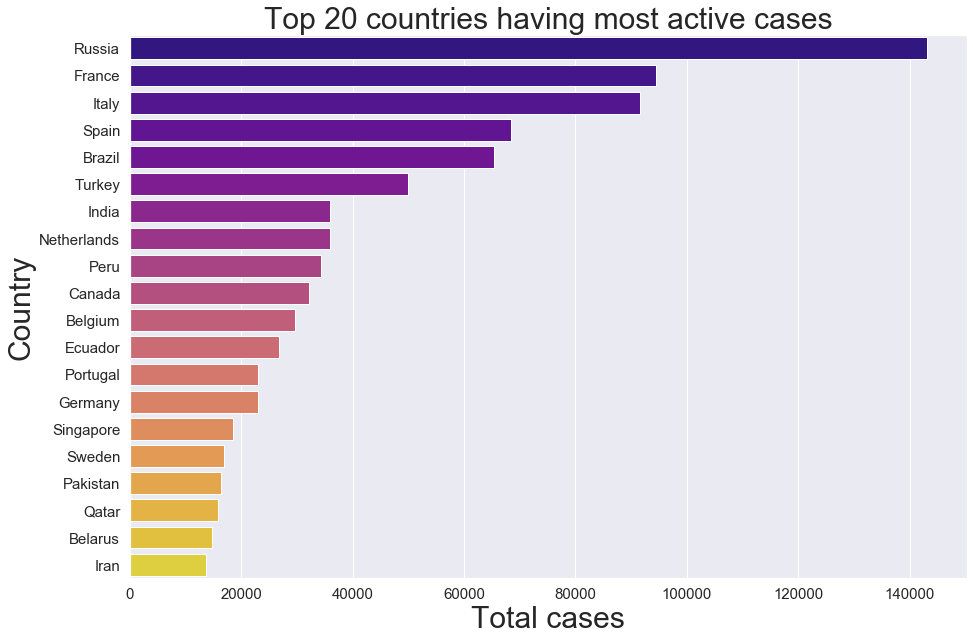

In [53]:
active_df = world.groupby(by = 'CountryOther')['ActiveCases'].sum().sort_values(ascending = False).head(20).reset_index()
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most active cases" , fontsize = 30)
ax = sns.barplot(x = active_df.ActiveCases, y = active_df['CountryOther'],palette = 'plasma') # real data
ax.set(xlabel='Total cases', ylabel='Country') #New name to xy labels

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

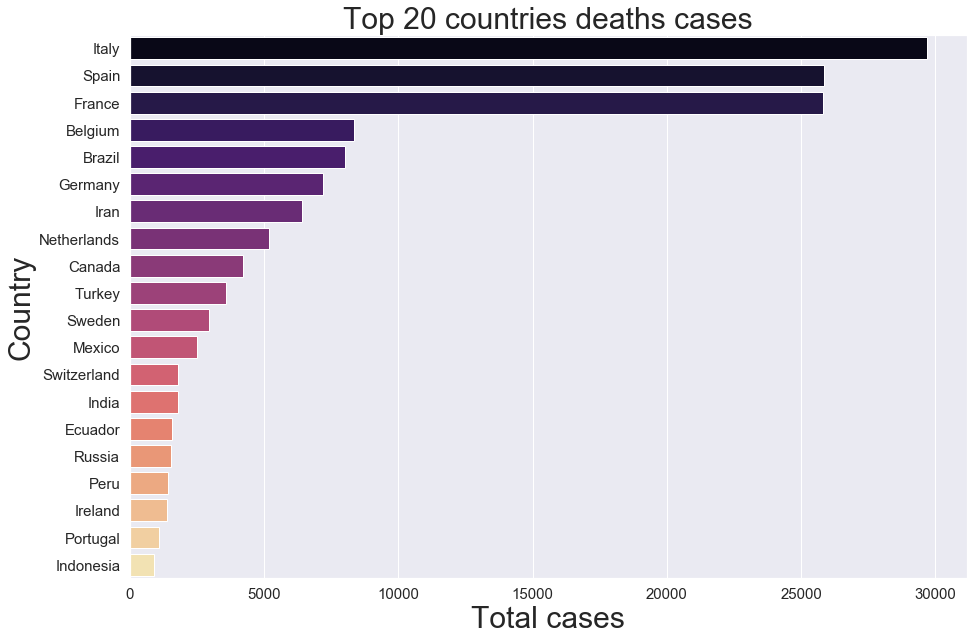

In [54]:
deaths_df = world.groupby(by = 'CountryOther')['TotalDeaths'].sum().sort_values(ascending = False).head(20).reset_index()
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total Deaths cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries deaths cases" , fontsize = 30)
ax = sns.barplot(x = deaths_df.TotalDeaths, y = deaths_df['CountryOther'],palette = 'magma') # real data
ax.set(xlabel='Total cases', ylabel='Country') #New name to xy labels

In [55]:
ratio_df = corona_df.groupby(by = 'CountryOther')['TotalCases','TotalRecovered','TotalDeaths'].sum().reset_index()
ratio_df['RecoveryPercentage'] =  round(((ratio_df['TotalRecovered']) / (ratio_df['TotalCases'])) *100 , 2)
ratio_df['death percentage'] =  round(((ratio_df['TotalDeaths']) / (ratio_df['TotalCases'])) * 100 , 2)
ratio_df.head()

,CountryOther,TotalCases,TotalRecovered,TotalDeaths,RecoveryPercentage,death percentage
0,Albania,832,595,31,71.51,3.73
1,Algeria,4997,2197,476,43.97,9.53
2,Andorra,751,521,46,69.37,6.13
3,Angola,36,11,2,30.56,5.56
4,Argentina,5020,1524,264,30.36,5.26


In [56]:
ratio_top=ratio_df.groupby(by = 'CountryOther')['TotalCases','death percentage'].sum().sort_values('TotalCases',ascending = False).head(20).reset_index()
ratio_top=ratio_top.sort_values('death percentage',ascending = False)
ratio_top.reset_index().drop(['index'], axis=1)

,CountryOther,TotalCases,death percentage
0,Belgium,50781,16.42
1,France,174191,14.82
2,Italy,214457,13.84
3,Netherlands,41319,12.59
4,Sweden,23918,12.30
5,Spain,253682,10.19
6,Mexico,26025,9.63
7,Canada,63375,6.66
8,Brazil,121600,6.60
9,Iran,101650,6.31


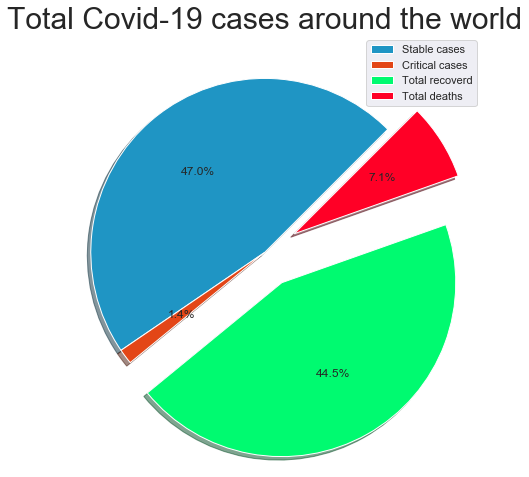

In [57]:
labels = ['Stable cases', 'Critical cases', 'Total recoverd', 'Total deaths']
sizes = [(corona_df['ActiveCases'].sum()-corona_df['SeriousCritical'].sum()),corona_df['SeriousCritical'].sum(),corona_df['TotalRecovered'].sum(),corona_df['TotalDeaths'].sum()]
colors = ['#1f95c4','#e34617', '#00fa70','#ff0026']
explode = (0,0,0.2,0.2)
plt.figure(figsize=(8,8))
plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%', shadow=True, startangle=45)
plt.title("Total Covid-19 cases around the world",fontsize = 30)
#ax1.legend(labels, loc="best")
plt.legend(labels, loc="best")
plt.show()

In [58]:
#Israel confirmed cases time series
israel=confirmed_df[confirmed_df['CountryOther'] == 'Israel']
israel_confirmed=israel
israel_confirmed=israel_confirmed.drop(['CountryOther'], axis=1)
print('Israel total confirmed cases')
israel_confirmed

Israel confirmed cases


,04-16-2020,04-17-2020,04-18-2020,04-19-2020,04-20-2020,04-21-2020,04-22-2020,04-23-2020,04-24-2020,04-25-2020,04-26-2020,04-27-2020,04-28-2020,04-29-2020,04-30-2020,05-01-2020,05-03-2020,05-04-2020,05-05-2020
63,7130,7130,7130,7130,7130,6910,5061,4809,4914,4650,4555,4253,3880,3333,3188,3119,2717,2533,2347


In [59]:
### Columne names key value
dates = israel_confirmed.keys()

In [60]:
### Create list of active cases per day Worldwide and Israel 
world_cases = [] # sum of all active cases all over the world
israel_cases= [] # sum of all active cases in israel

#Create list of all active cases worldwide and for israel
for i in dates:
    confirmed_sum = confirmed_df[i].sum() #sum of each column per day
    world_cases.append(confirmed_sum) # list of all cases per day
    il_sum=israel_confirmed[i].sum()
    israel_cases.append(il_sum)# list of all cases in Israel per day

In [61]:
### Futere forcast time series
days_in_future = 10 #days of predicition
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1) #list 0-85
adjusted_dates = future_forcast[:-10] #list 0-n

In [62]:
days_since_04_16 = np.array([i for i in range(len(dates))]).reshape(-1, 1) ##list 0-75

In [63]:
start = '4/16/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y') #convert to datetime-object
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y')) #future_forcast_dates = list of datetime objects + prediction days

# Total cases correlation heat map

In [64]:
correlation = corona_df.corr(method='pearson')
columns = correlation.nlargest(10, 'TotalCases').index
columns

Index(['TotalCases', 'TotalRecovered', 'ActiveCases', 'TotalDeaths',
       'TotalTests', 'SeriousCritical'],
      dtype='object')

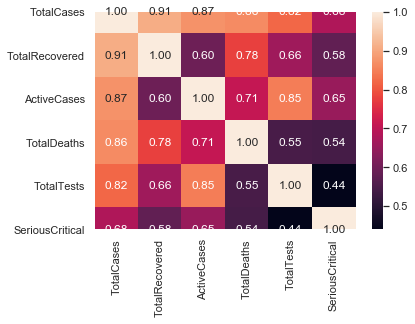

In [65]:
correlation_map = np.corrcoef(corona_df[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

# Prediction

In [66]:
#days_since_04_16 = list [0-n]  - X for the model
#world cases= list of cases per day - Y for the model

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_04_16, world_cases, test_size=0.30, shuffle=True)

In [67]:
# transform our data for polynomial regression world case
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

In [68]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
mse=mean_squared_error(test_linear_pred, y_test_confirmed)
rmse=sqrt(mse)
r2 = r2_score(y_test_confirmed,test_linear_pred)
print('r2_score:',r2)
print('root Mean square error:',rmse)

MAE: 5191.996312954463
r2_score: 0.7425260541000153
root Mean square error: 6471.259264024737


Text(0.5, 1.0, 'Worldwid prediction')

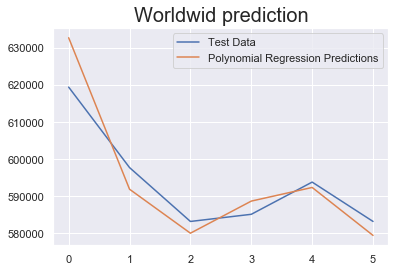

In [69]:
### Plot of test data vs Predictions of total world cases
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])
plt.title('Worldwid prediction',size=20)

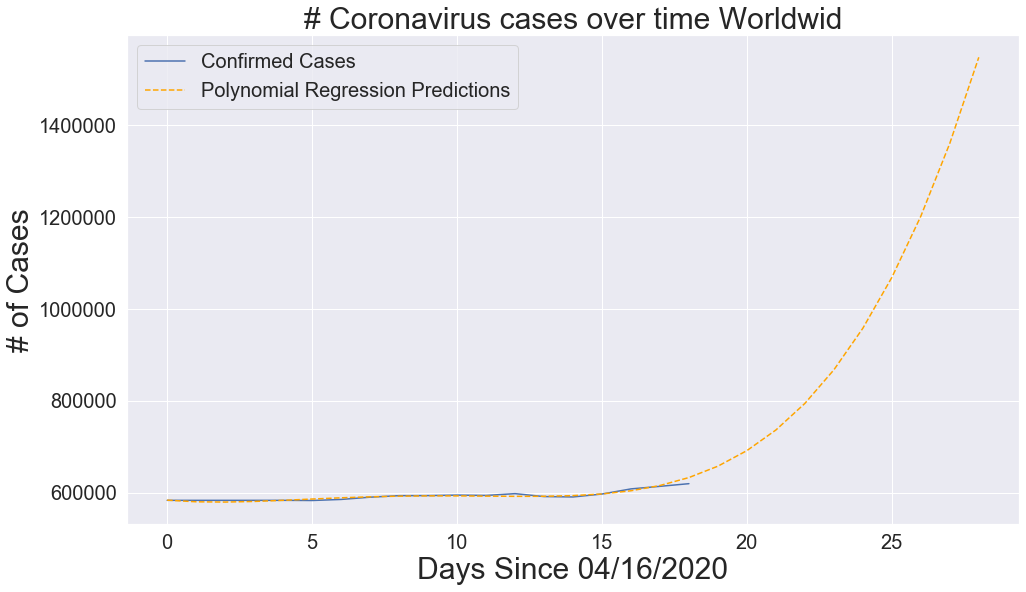

In [70]:
### Plot of test data vs Predictions of total world cases
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='orange')
plt.title('# Coronavirus cases over time Worldwid', size=30)
plt.xlabel('Days Since 04/16/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [71]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_04_16, israel_cases, test_size=0.15, shuffle=True)

In [72]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

In [73]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))
r2 = r2_score(test_linear_pred,y_test_confirmed)
print('r2 score:',r2)

MAE: 407.10146395874625
MSE: 327177.4266737784
r2 score: 0.7241710641844388


Text(0.5, 1.0, 'Israel prediction')

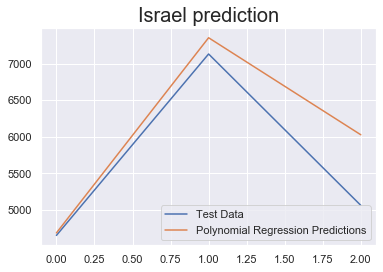

In [74]:
### Plot of test data vs Predictions israel casese
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])
plt.title('Israel prediction',size=20)

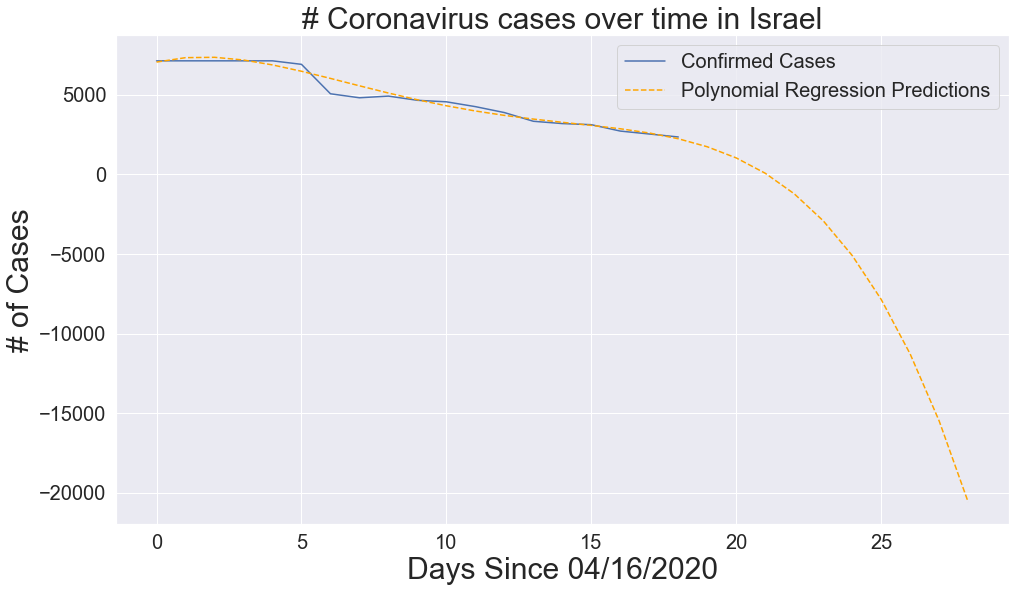

In [75]:
###Coronavirus Cases Over Time in israel
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, israel_cases)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='orange')
plt.title('# Coronavirus cases over time in Israel', size=30)
plt.xlabel('Days Since 04/16/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Conclusions 

I ran predictions on number of toal covid-19 cases worldwide and in israel.
From the predictions, we can see that the number of cases world wide is increasing exponentialy however, we can see that in Israel the total cases in decreasing. Maybe one of the main explansions for the decrease is that the citizens of Israel followd the unusual restrictions.
